In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [ ]:
#CapStone II Project

In [2]:
#The downlaod and read the raw data 
df = pd.read_csv('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [3]:
#check the number of rows and columns
df.shape

(423857, 25)

In [4]:
#See the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [5]:
df['model'].value_counts().head(10)

f-150             6073
silverado 1500    3878
escape            3208
camry             2906
1500              2898
accord            2813
altima            2592
explorer          2481
civic             2472
silverado         2321
Name: model, dtype: int64

In [6]:
df['model'].nunique()

27042

In [7]:
df['manufacturer'].unique()

array(['gmc', 'hyundai', 'toyota', 'mitsubishi', 'ford', 'chevrolet',
       'ram', nan, 'buick', 'jeep', 'dodge', 'subaru', 'nissan', 'audi',
       'rover', 'lexus', 'honda', 'chrysler', 'mini', 'pontiac',
       'mercedes-benz', 'cadillac', 'bmw', 'kia', 'volvo', 'volkswagen',
       'jaguar', 'acura', 'saturn', 'mazda', 'mercury', 'lincoln',
       'infiniti', 'ferrari', 'fiat', 'tesla', 'land rover',
       'harley-davidson', 'datsun', 'alfa-romeo', 'morgan',
       'aston-martin', 'porche', 'hennessey'], dtype=object)

In [8]:
#Drop undersired features 
df1 = df.copy()

In [9]:
#The type of variables
df1.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [10]:
#The variable to be dropped

df1 = df1.drop(['id', 'url','region','region_url', 'vin','lat', 'long', 'image_url','description', 'county'], axis = 1)
df1.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,mn
1,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,mn
2,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,ct
3,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,nm
4,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,mn


In [11]:
#check the dimension
df1.shape

(423857, 15)

In [14]:
df1.isnull().sum()

price                0
year             95114
manufacturer    110615
model            98473
condition       247138
cylinders       226178
fuel             96643
odometer        153272
title_status     96098
transmission     95792
drive           192738
size            321230
type            182700
paint_color     201654
state                0
dtype: int64

In [12]:
#Transpose the dataset to be convinient to get percentage of null values
df1_T = df1.T

In [13]:
df1_T.head()

,0,1,2,3,4,5,6,7,8,9,...,423847,423848,423849,423850,423851,423852,423853,423854,423855,423856
price,6995,8750,10900,12500,16995,13995,7995,8995,10995,12995,...,4990,19995,9885,750,4800,1600,9000,700,3800,8650
year,2000,2013,2013,2003,2007,2012,2010,2011,2014,2004,...,2007,2010,2012,2002,2002,2006,2003,1994,1999,2015
manufacturer,gmc,hyundai,toyota,mitsubishi,gmc,ford,chevrolet,chevrolet,ford,ram,...,ford,gmc,subaru,saturn,ford,hyundai,toyota,ford,lincoln,nissan
model,new sierra 1500,sonata,prius,lancer,sierra classic 2500hd,f-150,equinox,traverse,explorer,2500,...,freestyle,sierra 1500,forester 2.5x premium awd,sc2,mustang gt coupe,sonata,sequoia limited,f-150,town car,versa
condition,excellent,excellent,good,good,good,good,good,good,good,good,...,NaN,NaN,excellent,salvage,good,fair,excellent,fair,excellent,NaN


In [14]:
#The number of null values  and the percentage of null values 

missing = pd.DataFrame(df1_T.isnull().sum(axis = 1))
missing.columns = ['count']
missing['%'] = ( missing['count'] /len(df1)) *100
missing.sort_values(by='count', ascending=False).head(10)

,count,%
size,321230,75.787353
condition,247138,58.306929
cylinders,226178,53.361865
paint_color,201654,47.575951
drive,192738,45.472412
type,182700,43.104160
odometer,153272,36.161252
manufacturer,110615,26.097245
model,98473,23.232600
fuel,96643,22.800850


In [16]:
df1['odometer'].describe()

count    2.705850e+05
mean     9.942578e+04
std      1.204833e+05
min      0.000000e+00
25%      4.432400e+04
50%      9.174900e+04
75%      1.372370e+05
max      1.000000e+07
Name: odometer, dtype: float64

#The Distirbution of the odometer dataset is varies  from zero until 10 millions, There is extereme 
outlier values.

In [18]:
#Drop Null values from the dataset
nan_freedf1 =  df1[df1['odometer'].notna()]
nan_freedf1.isnull().sum()

price                0
year               918
manufacturer     10907
model             2059
condition       119126
cylinders        94570
fuel              2182
odometer             0
title_status      1664
transmission      1327
drive            61924
size            179740
type             49398
paint_color      68802
state                0
dtype: int64

# Odometer null value removed

In [18]:
#check the shape 
print(df1['price'].skew())
df1['price'].describe()

286.6653149470297


count    4.238570e+05
mean     5.779437e+04
std      1.002581e+07
min      0.000000e+00
25%      4.499000e+03
50%      9.995000e+03
75%      1.899500e+04
max      3.808256e+09
Name: price, dtype: float64

#positive skew 286.66 means the distribution is skewed extermely to the right

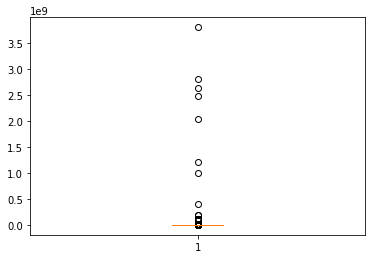

In [20]:
plt.boxplot(df1['price'])
plt.show()

Median of the distribution is between 0.1 - 0.2  compared the max range value near to 4

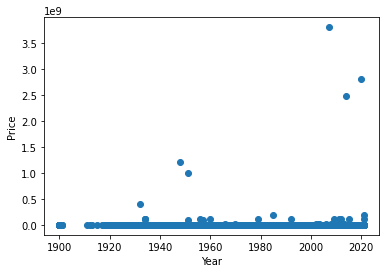

In [23]:
#scatterplot 
#fig, ax = plt.subplots(figsize = (12, 6))

plt.scatter(df1['year'], df1['price'], marker = 'o')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [19]:
#Removing extreme values or outliers 
features = [features for features in df1.columns if features in ['price', 'odometer']]


In [20]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'odometer', data=df1, alpha=0.5)
        ax.set(xlabel=col, ylabel='price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

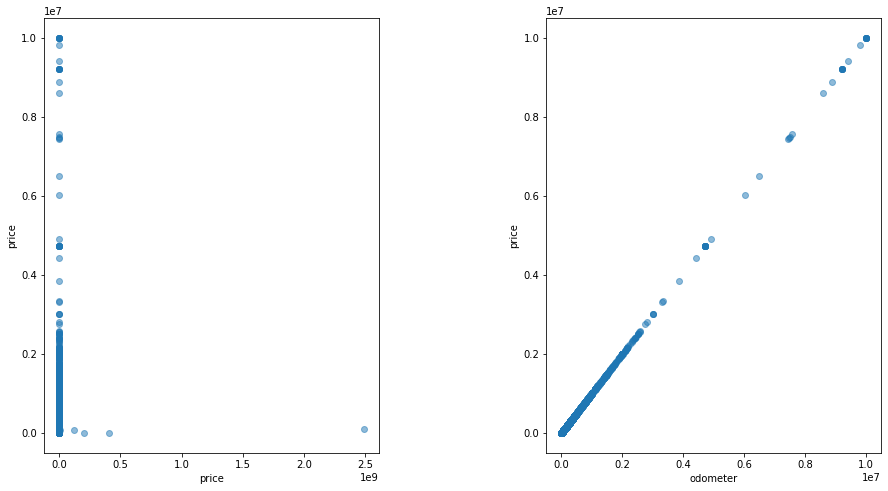

In [17]:
scatterplots(features, ncol=2, figsize=(15,8))

From the scatter plot the relationship between odometer versus price is perfectly linear

In [20]:
#Filter care Price above hunderd thousands considered as outlier

price_above_limit = df1[df1['price'] > 100000]
price_above_limit.sort_values(by = 'price', ascending = False).head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
300026,3808256046,2007.0,saturn,aura,good,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,red,mi
207260,2808348671,2020.0,gmc,NaN,NaN,8 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,ca
74638,2632269824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
67033,2490531375,2014.0,dodge,dart,good,4 cylinders,gas,112589.0,clean,automatic,fwd,compact,sedan,red,ga
83332,2039470154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny


We can easily understand the price value for some cars beyond the range of car price or it is 
exterme therefore dropping such values enhance the accuracy of prediction.

In [33]:
price_below_limit = df1[df1['price'] < 750]
price_below_limit.sort_values(by = 'price', ascending = True).head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state


There are price values which has zero or below $750  value should be removed, for they inhibit the prediction accuracy

In [22]:
#Repeat the same analysis for the odometer 
odometer_above_range = df1[df1['odometer'] > 300000]
odometer_above_range.sort_values(by = 'odometer', ascending = False).head(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
262696,3800,1936.0,chevrolet,NaN,fair,6 cylinders,gas,10000000.0,rebuilt,manual,rwd,full-size,sedan,black,sd
95592,38900,1990.0,NaN,peterbilt 379,good,8 cylinders,diesel,10000000.0,clean,manual,rwd,NaN,truck,grey,nj
311730,6200,1915.0,NaN,Maxwell one ton,good,4 cylinders,gas,10000000.0,missing,manual,rwd,NaN,truck,black,ia
197083,1400,2000.0,chevrolet,silverado,good,8 cylinders,gas,10000000.0,clean,automatic,4wd,full-size,truck,black,oh
328085,8750,1954.0,cadillac,eldorado,fair,NaN,gas,9999999.0,clean,other,rwd,NaN,convertible,green,tx


we undertand that few cars have odometers values is extremely large which emanating from either typo error 
or value error, anyway such  extreme values deteriorate the prediction accuracy and we should drop the
values from the dataset.

 Odometer above 300K is considered as extreme value and need to drop the outliers from the dataset

In [23]:
odometer_below_range = df1[df1['odometer'] < 10000]
odometer_below_range.sort_values(by = 'odometer', ascending = True).head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,0,2015.0,dodge,i,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,other,white,mn
58540,0,2014.0,ford,f550 4x4,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,other,white,mn
128089,20900,2017.0,ford,e-450,NaN,NaN,gas,0.0,clean,other,NaN,NaN,other,white,ne
353273,10995,1993.0,gmc,yukon,NaN,NaN,gas,0.0,clean,automatic,4wd,NaN,NaN,blue,wi
353296,19995,1971.0,chevrolet,1500 silverado,NaN,NaN,gas,0.0,clean,automatic,NaN,NaN,NaN,green,wi


In [27]:
#Trimming the outliers from Price
index = df1[(df1['price'] > 100000) | (df1['price'] < 750)].index
df1.drop(index, inplace = True)
df1['price'].describe()

count    376494.000000
mean      15345.177562
std       12823.165385
min         750.000000
25%        5999.000000
50%       11950.000000
75%       19999.000000
max      100000.000000
Name: price, dtype: float64

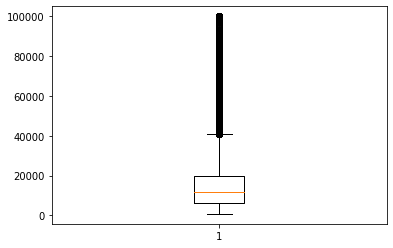

In [29]:
# Exterme values removed from the price columns, the box plot shows still there is extreme values 
#car price above 40,000 dollar
plt.boxplot(df1['price'])
plt.show()

In [30]:

#Trimming the outliers from Price
index = df1[(df1['odometer'] > 300000) | (df1['odometer'] < 10000)].index
df1.drop(index, inplace = True)
df1['odometer'].describe()

count    230777.000000
mean     101796.347643
std       58191.121225
min       10000.000000
25%       53188.000000
50%       97023.000000
75%      141000.000000
max      300000.000000
Name: odometer, dtype: float64

In [46]:
#correcting the values in codition column
#pd.Categorical(df1['conditon'])
df1['condition'].unique()

array(['excellent', 'good', 'fair', nan, 'like new', 'salvage', 'new'],
      dtype=object)